# Modelo Binomial

## 📚 Librerias

In [3]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

## 📄📥 Cargar el archivo

In [4]:
ruta="Fashion_Retail_Sales_ensayo_S02.xlsx"
df=pd.read_excel(ruta, engine='openpyxl')
df.head(6)

,Unnamed: 0,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,0,4018,Handbag,559.0,05-02-2023,NaN,Credit Card
1,1,4115,Tunic,733.7,11-07-2023,2.0,Credit Card
2,2,4019,Tank Top,639.9,23-03-2023,4.1,Cash
3,3,4097,Leggings,213.1,15-03-2023,3.2,Cash
4,4,3997,Wallet,731.3,27-11-2022,4.7,Cash
5,5,4080,Onesie,748.5,11-12-2022,4.5,Credit Card


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             512 non-null    int64  
 1   Customer Reference ID  512 non-null    int64  
 2   Item Purchased         512 non-null    object 
 3   Purchase Amount (USD)  512 non-null    float64
 4   Date Purchase          512 non-null    object 
 5   Review Rating          462 non-null    float64
 6   Payment Method         512 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 28.1+ KB


In [8]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    263
Cash           249
Name: count, dtype: int64

### 🔍 Eliminar datos Nulos NaN 

In [9]:
df.isnull().sum()

Unnamed: 0                0
Customer Reference ID     0
Item Purchased            0
Purchase Amount (USD)     0
Date Purchase             0
Review Rating            50
Payment Method            0
dtype: int64

# Distribución Binomial

## 🎯 Resolver problema 1 

Calcula la probabilidad de exito (p) como la proporción de consumidores que realizaron la compra y
pagaron con efectivo (Cash)

### 🟢 Paso 1: Identificar la columna que contiene el método de pago

🔍 Pista:

- Utiliza ``df.columns`` para visualizar todas las columnas disponibles.

- Puedes verificar rápidamente los valores únicos de una columna utilizando `df['columna'].unique()`.

In [14]:
print(df.columns)
print(df['Payment Method'].unique())

Index(['Unnamed: 0', 'Customer Reference ID', 'Item Purchased',
       'Purchase Amount (USD)', 'Date Purchase', 'Review Rating',
       'Payment Method'],
      dtype='object')
['Credit Card' 'Cash']


### 🟢 Paso 2: Filtrar por método de pago 'Cash'

In [15]:
compras_cash = df[df['Payment Method'] == 'Cash']
cantidad_cash = compras_cash.shape[0]

### 🟢 Paso 3: Obtener el total de consumidores

In [17]:
total_consumidores = df.shape[0]
total_consumidores

512

### 🟢 Paso 4: Calcular la probabilidad de éxito (p)

La probabilidad de éxito ($p$) se calcula como:

$
p = \frac{\text{Consumidores que pagaron en efectivo}}{\text{Total de consumidores}}
$

In [26]:
p = cantidad_cash / total_consumidores
print("Probabilidad de éxito (p) es:", round(p,2))

Probabilidad de éxito (p) es: 0.49


Este resultado indica la probabilidad de éxtio para usarlo en la distribcuión binomial

## 🎯 Resolver problema 2 

Supón que seleccionas al azar 25 consumidores. Utilizando el valor de la probabilidad p calculado,
modela la probabilidad de que exactamente k consumidores realicen una compra, para $k = 0; 1; ...; 25$.

**Sol:**

Sea
$X=$ Clientes pagan con Cash.

Se sabe que:
- Cada cliente es un intento independiente.
- La probabilidad de éxito (pagar con Cash) es
$p=0.49$
- Se atienden $n=25$ clientes

De lo anterior, se tiene que
$$
X\sim Binom(n=25,p=0.49)
$$



La sintaxis correcta de la función `binom.pmf(k, n, p)` es:

- `k`: número exacto de éxitos (clientes que pagan con efectivo).
- `n`: cantidad total de ensayos o intentos (clientes que seleccionas, aquí es 25).
- `p`: probabilidad de éxito (calculado previamente, en tu caso es `0.49`).

In [35]:
n=25
binomial=ss.binom.pmf(25,n,p)
print(f"P(X=25): {binomial}")

P(X=25): 1.4901660095886016e-08


Para ver la probabilidad para distintos valores de $𝑘$, lo puedes calcular para todos con un ciclo ``for``:

In [37]:
for k in range(26):  # desde 0 hasta 25 clientes
    prob = ss.binom.pmf(k, n, p)
    print(f"P(X={k}): {prob}")

P(X=0): 5.849849429753125e-08
P(X=1): 1.384612650198223e-06
P(X=2): 1.5730884406054278e-05
P(X=3): 0.0001141834917534512
P(X=4): 0.0005945790568682572
P(X=5): 0.0023642995348776533
P(X=6): 0.0074614776195758604
P(X=7): 0.019174497891479295
P(X=8): 0.040846054919016286
P(X=9): 0.07304662039382993
P(X=10): 0.11065313142548253
P(X=11): 0.14285843272526008
P(X=12): 0.1577961015463423
P(X=13): 0.14939630906859025
P(X=14): 0.12123741757114295
P(X=15): 0.08417472413874781
P(X=16): 0.0498087127151812
P(X=17): 0.0249656285382958
P(X=18): 0.010505182097229707
P(X=19): 0.0036643050621315513
P(X=20): 0.0010407740993963023
P(X=21): 0.00023461230377483128
P(X=22): 4.038607925332397e-05
P(X=23): 4.9873369486250445e-06
P(X=24): 3.9348761096566465e-07
P(X=25): 1.4901660095886016e-08


### 📊 Visualización

In [38]:
k = np.arange(0, n + 1)


In [39]:
probabilidades = ss.binom.pmf(k, n, p)


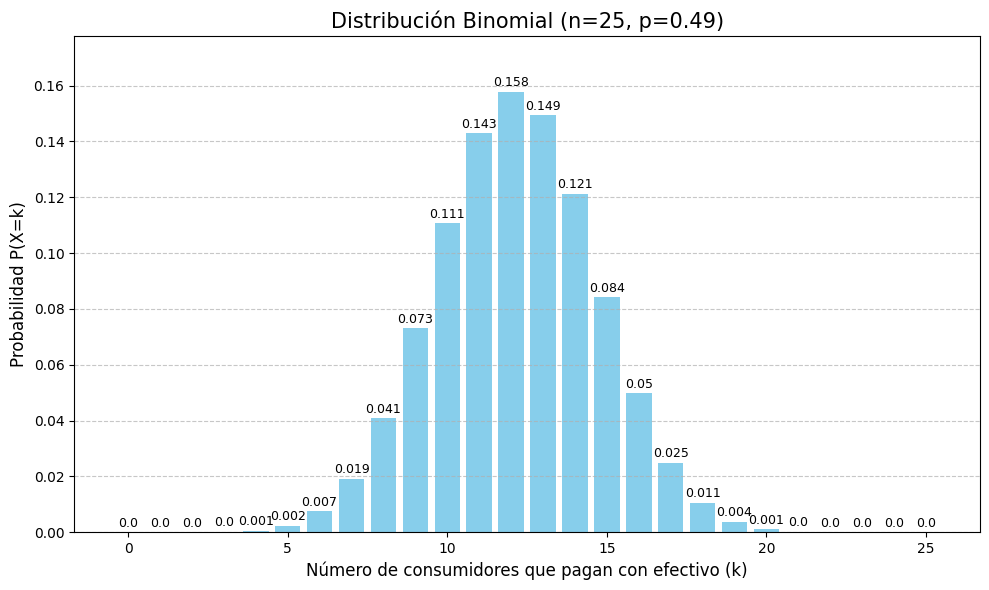

In [45]:
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.bar(k, probabilidades, color='skyblue', edgecolor='none')

# Etiquetas y títulos
plt.title('Distribución Binomial (n=25, p=0.49)', fontsize=15)
plt.xlabel('Número de consumidores que pagan con efectivo (k)', fontsize=12)
plt.ylabel('Probabilidad P(X=k)', fontsize=12)

# Mostrar los valores en cada barra
for i in range(len(k)):
    plt.text(k[i], probabilidades[i] + 0.002, round(probabilidades[i], 3),
             ha='center', fontsize=9)

# Límites del eje Y
plt.ylim(0, max(probabilidades) + 0.02)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()
